<a href="https://colab.research.google.com/github/Moesess/ML_Project/blob/MonikaBranch/LogisticReggression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [347]:
#wczytanie pliku z danymi z dysku google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [348]:
import pandas as pd
import numpy as np


In [349]:
#wytworzenie macierzy wejściowych

# Tworzymy zbiór danych x o następującej strukturze:
#          data         dzień tygodnia    godzina    Zużycie energii
# 0        2023-01-01   1                 0:01        6,00
# 1        2023-01-01   1                 0:02        4,00
# ...

# filePath = '/content/drive/MyDrive/Colab Notebooks/Zeszyt1.xlsx'
filePath = 'CSV/Zeszyt1.xlsx'
nazwy_kolumn = ['data','dzień tygodnia','godzina','zużycie energii']
xls = pd.ExcelFile(filePath)
dane_wejsciowe_X = xls.parse('styczeń', usecols=nazwy_kolumn)

#Przekształcamy pola w macierzy na odpowiednie type
dane_wejsciowe_X['data'] = pd.to_datetime(dane_wejsciowe_X['data'], format='%Y-%m-%d')
# Przekształć kolumnę 'godzina' na format string
dane_wejsciowe_X['godzina_str'] = dane_wejsciowe_X['godzina'].astype(str)


# Przekształć kolumnę 'data' na cechy liczbowe
dane_wejsciowe_X['rok'] = dane_wejsciowe_X['data'].dt.year
dane_wejsciowe_X['miesiac'] = dane_wejsciowe_X['data'].dt.month
dane_wejsciowe_X['dzien'] = dane_wejsciowe_X['data'].dt.day
dane_wejsciowe_X['godzina'] = dane_wejsciowe_X['godzina_str'].str.split(':').str[0].astype(int)
dane_wejsciowe_X['minuta'] = dane_wejsciowe_X['godzina_str'].str.split(':').str[1].astype(int)

# Usuń kolumnę 'data', ponieważ już ją przekształciliśmy
dane_wejsciowe_X.drop(['data','godzina_str'], axis=1, inplace=True)

#dane_wejsciowe_X = pd.read_excel(filePath, sheet_name = ['styczeń'], usecols = nazwy_kolumn)

#robimy to samo dla danych wejściowych Y
xls2 = pd.ExcelFile(filePath)
dane_wejsciowe_Y =xls.parse('styczeń', usecols = ['obecnosc'])


In [350]:
print(dane_wejsciowe_X)
print(dane_wejsciowe_Y)
print(dane_wejsciowe_X['minuta'])

       dzień tygodnia  godzina  zużycie energii   rok  miesiac  dzien  minuta
0                   1        0                6  2023        1      1       1
1                   1        0                4  2023        1      1       2
2                   1        0                6  2023        1      1       3
3                   1        0                6  2023        1      1       4
4                   1        0                4  2023        1      1       5
...               ...      ...              ...   ...      ...    ...     ...
44604               3       23                6  2023        1     31      55
44605               3       23                6  2023        1     31      56
44606               3       23                6  2023        1     31      57
44607               3       23                6  2023        1     31      58
44608               3       23                4  2023        1     31      59

[44609 rows x 7 columns]
       obecnosc
0             0
1     

In [351]:
#Implementacja algorytmu Logistic regression

class LogisticRegression():

  def __init__(self,learning_rate=0.001, number_of_iterations = 1000):
    self.learning_rate = learning_rate
    self.number_of_iterations = number_of_iterations
    self.weights = None
    self.bias = None

  @staticmethod
  def Sigmoidfunction(x):
    return 1/(1+np.exp(-x))

  def fit(self, X, y):
    number_of_samples, number_of_features = X.shape
    self.weights = np.zeros(number_of_features)
    self.bias = 0

    for i in range(self.number_of_iterations):
      linear_predictions = np.dot(X, self.weights) + self.bias
      y_predictions = self.Sigmoidfunction(linear_predictions)

      #print(f"y_predictions: {y_predictions}")
      #print(f"y: {y}")

      dw =(1/number_of_samples)* np.dot(X.transpose(),(y_predictions - y))
      db = (1/number_of_samples)* np.sum(y_predictions - y)
      #print(f"dw: {dw}")
      #print(f"db: {db}")
      self.weights = self.weights - self.learning_rate * dw
      self.bias = self.bias - self.learning_rate * db


  def predict(self, X):
    linear_predictions = np.dot(X, self.weights) + self.bias
    y_predicted = self.Sigmoidfunction(linear_predictions)
    final_predictions = [0 if y<= 0.5 else 1 for y in y_predicted]
    #final_predictions = [1 if y > threshold else 0 for y in y_predicted]
    print('prawdopodobieństwo:', y_predicted)
    print('Werdykt: ', final_predictions)
    return final_predictions




In [352]:
#funkcja sprawdzająca jaka część przewidywanych wartości pokrywa się z danymi testowymi
def accuracy(y_pred, y_test):
  a = np.sum(y_pred == y_test)/len(y_test)
  print("Dokladnosc klasyfikatora wynosi: ", a)


In [353]:
#Implementacja treningu modelu
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#data = datasets.load_diabetes()
#X, y = data.data, data.target
X, y = dane_wejsciowe_X, dane_wejsciowe_Y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1234)

classifier = LogisticRegression(learning_rate=0.00001)
y_train = y_train.squeeze().values
classifier.fit(X_train, y_train)
results = classifier.predict(X_test)

y_test = y_test.squeeze().values
a = accuracy(results, y_test)



prawdopodobieństwo: [0.01462846 0.01436191 0.01305076 ... 0.98971408 0.0146256  0.01768798]
Werdykt:  [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 

In [354]:
#Wyswietlanie wykresu
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize = (8,6))
#plt.scatter(X_test,results,color='black', marker = 'o', s=30)
#m1 = plt.scatter(X_train[:,0], y_train, color = cmap(0.9), s=10)
#m2 = plt.scatter(X_test[:,0], y_test, color=cmap(0.5), s=10)
plt.show()

<Figure size 800x600 with 0 Axes>

In [355]:
print(X.shape)

(44609, 7)


In [356]:
print(y.shape)

(44609, 1)


prawdopodobieństwo: [0.01583465 0.0142575  0.01583727 ... 0.01437696 0.01437815 0.01294416]
Werdykt:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

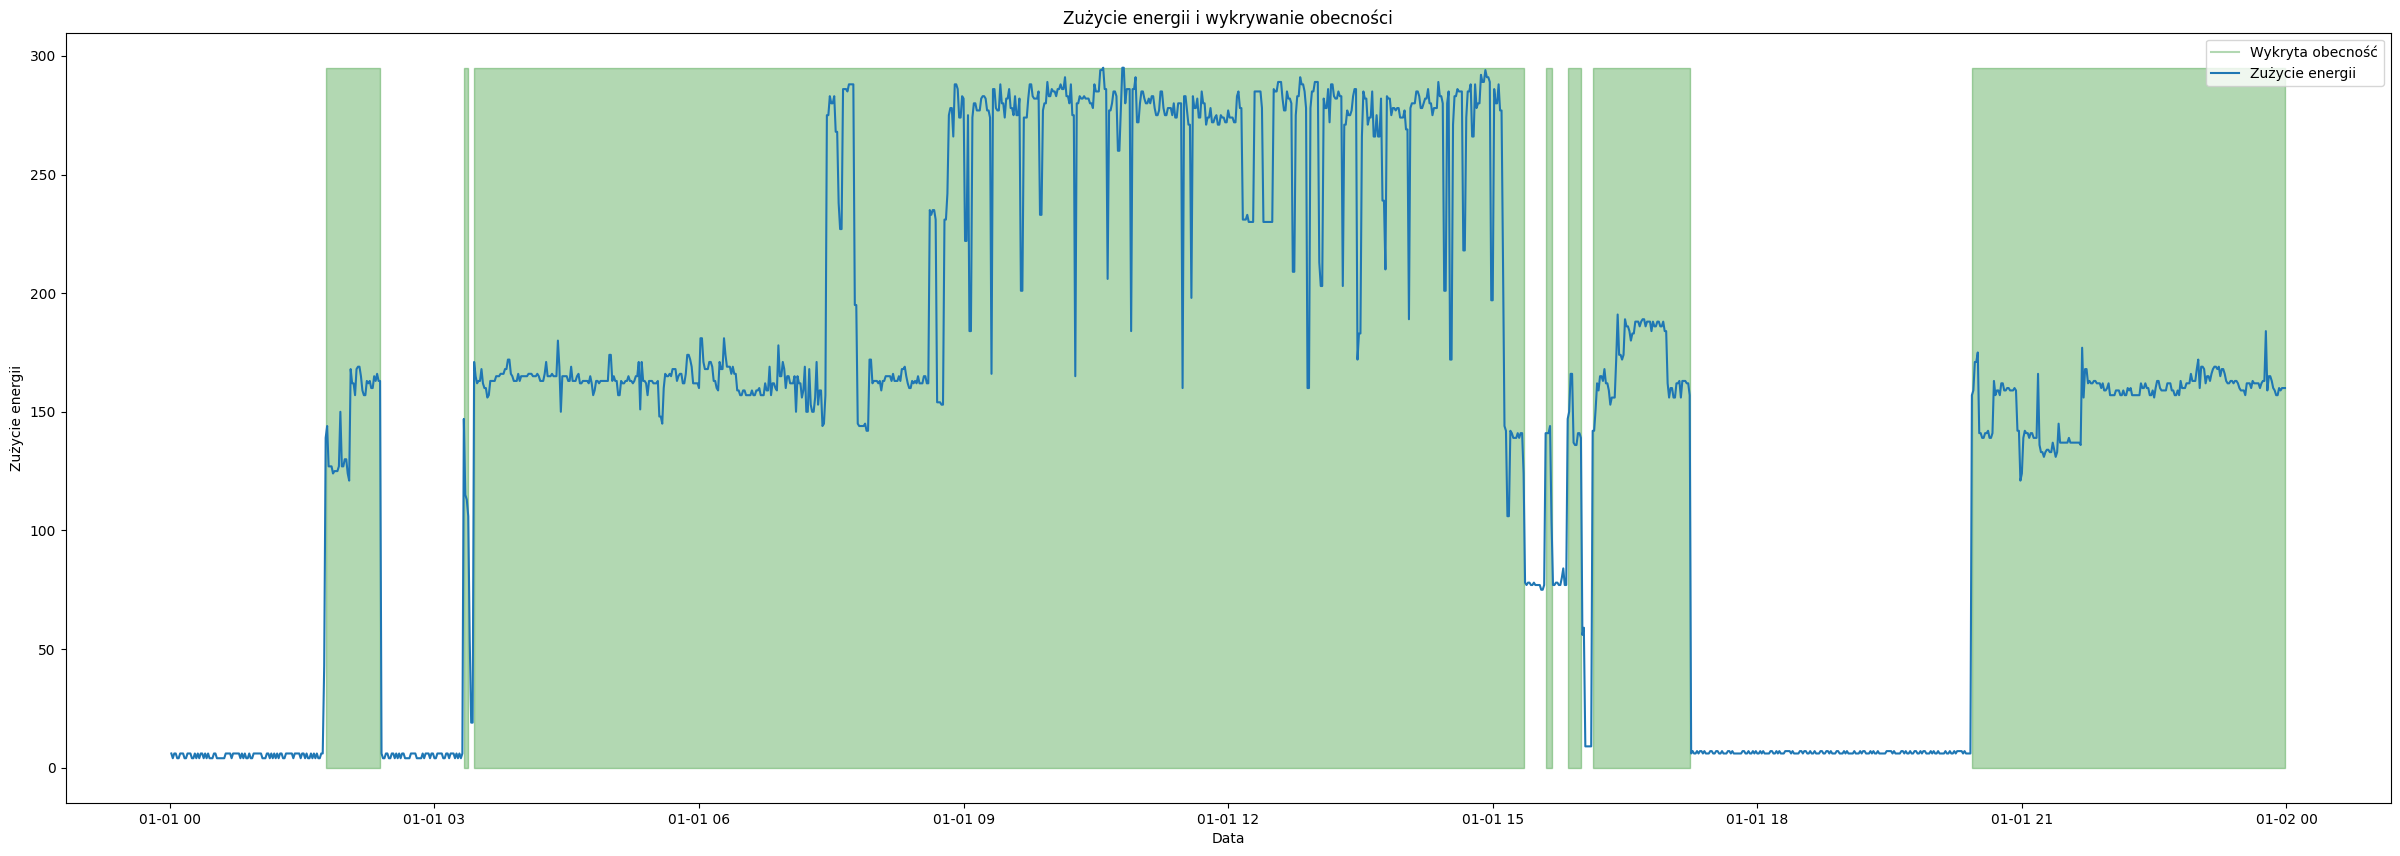

In [357]:
import matplotlib.dates as mdates

X_chart = X
Y_chart = y

results = classifier.predict(X_chart)

Y_chart = Y_chart.squeeze().values
a = accuracy(results, Y_chart)

# print(results)

X_chart["obecność"] = results
X_chart['data'] = pd.to_datetime(X_chart['rok'].astype(str) + '-' + 
                                 X_chart['miesiac'].astype(str) + '-' + 
                                 X_chart['dzien'].astype(str) + ' ' + 
                                 X_chart['godzina'].astype(str) + ':' + 
                                 X_chart['minuta'].astype(str))
X_chart.sort_values(by="data", inplace=True)

print(X_chart)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator())
# plt.gcf().autofmt_xdate()

X_chart_filtered = X_chart[(X_chart['data'].dt.date == pd.to_datetime('2023-01-01').date())] #& 
                        #  (X_chart['data'].dt.date <= pd.to_datetime('2023-01-01').date())]
plt.figure(figsize=(30, 10))

for i in range(1, len(X_chart_filtered)):
    if X_chart_filtered.iloc[i]['obecność'] == 1:
        if X_chart_filtered.iloc[i-1]['obecność'] == 0 or i == 1:
            start = X_chart_filtered.iloc[i]['data']
        if i == len(X_chart_filtered) - 1 or X_chart_filtered.iloc[i+1]['obecność'] == 0:
            end = X_chart_filtered.iloc[i]['data']
            plt.fill_betweenx(y=[0, max(X_chart_filtered['zużycie energii'])], 
                              x1=start, x2=end, color='green', alpha=0.3)


plt.plot([], [], color='green', alpha=0.3, label='Wykryta obecność')

plt.plot(X_chart_filtered['data'], X_chart_filtered['zużycie energii'], label='Zużycie energii')
plt.xlabel('Data')
plt.ylabel('Zużycie energii')
plt.title('Zużycie energii i wykrywanie obecności')
plt.legend()
plt.show()